# Morris-Lecar model

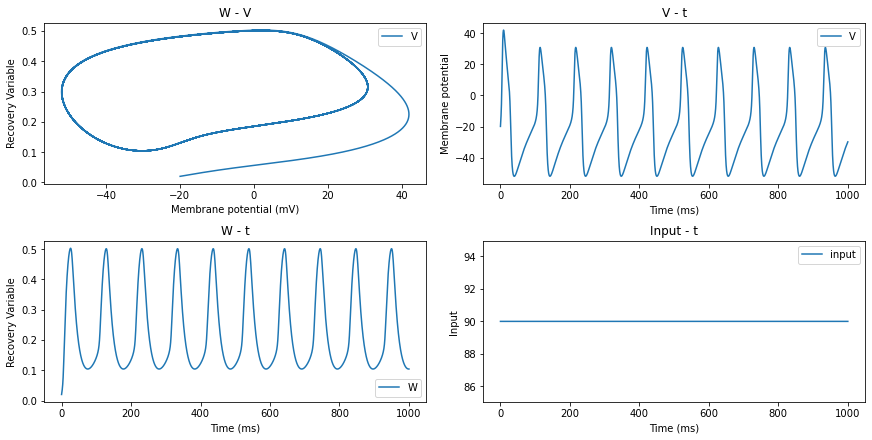

In [1]:
# -*- coding: utf-8 -*-

import brainpy as bp
import matplotlib.pyplot as plt

import bpmodels

bp.profile.set(backend='numba', dt=0.02, merge_steps=True)
ML = bpmodels.neurons.get_MorrisLecar(noise=0.)

'''The current is constant'''
neu = bp.NeuGroup(ML, geometry=(100,), monitors=['V', 'W'])
current = bp.inputs.ramp_current(90, 90, 1000, 0, 1000)
neu.run(duration=1000., inputs=['ST.input', current], report=False)

fig, gs = bp.visualize.get_figure(2, 2, 3, 6)
fig.add_subplot(gs[0, 0])
plt.plot(neu.mon.V[:, 0], neu.mon.W[:, 0], label='V')
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Recovery Variable')
plt.title('W - V')
plt.legend()

fig.add_subplot(gs[0, 1])
plt.plot(neu.mon.ts, neu.mon.V[:, 0], label='V')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential')
plt.title('V - t')
plt.legend()

fig.add_subplot(gs[1, 0])
plt.plot(neu.mon.ts, neu.mon.W[:, 0], label='W')
plt.xlabel('Time (ms)')
plt.ylabel('Recovery Variable')
plt.title('W - t')
plt.legend()

fig.add_subplot(gs[1, 1])
plt.plot(neu.mon.ts, current, label='input')
plt.xlabel('Time (ms)')
plt.ylabel('Input')
plt.title('Input - t')
plt.legend()

plt.show()